In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [2]:
df = pd.read_csv('Beehive Metrics Dataset/humidity_2017.csv')
df.head()

,timestamp,humidity
0,2017-01-01 05:00:00,92.406667
1,2017-01-01 06:00:00,92.270000
2,2017-01-01 07:00:00,92.575000
3,2017-01-01 08:00:00,92.840000
4,2017-01-01 09:00:00,93.640000


In [3]:
#How many rows?
len(df.index)

8737

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8737 non-null   object 
 1   humidity   8737 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.4+ KB


In [5]:
#Change the timestamp field to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
#Print the info again to ensure the data type was changed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8737 non-null   datetime64[ns]
 1   humidity   8737 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.6 KB


In [7]:
#Show some data again to ensure that the timestamps didn't get messed up
df.head()

,timestamp,humidity
0,2017-01-01 05:00:00,92.406667
1,2017-01-01 06:00:00,92.270000
2,2017-01-01 07:00:00,92.575000
3,2017-01-01 08:00:00,92.840000
4,2017-01-01 09:00:00,93.640000


In [8]:
#Show mean, standard dev, min, max, and IQRs
df.describe()

,humidity
count,8737.000000
mean,74.897176
std,15.596232
min,-66.710000
25%,61.863167
50%,79.757667
75%,87.646667
max,99.651667


In [9]:
#Count blanks or whitespaces
df = df.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df.isnull().sum()

timestamp    0
humidity     0
dtype: int64

In [10]:
#Nope
df[df.isna().any(axis=1)]

,timestamp,humidity


In [11]:
#How many unique values?
for column in df:
    print(column, len(df[column].unique()))

timestamp 8736
humidity 8560


array([[<AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

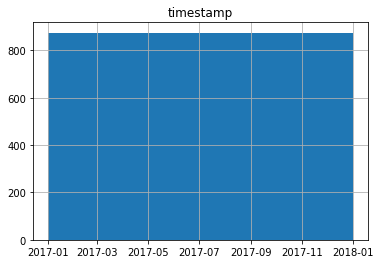

In [12]:
#Histogram of timestamps, should be even across the board
#Measured hourly
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(column='timestamp')

array([[<AxesSubplot:title={'center':'humidity'}>]], dtype=object)

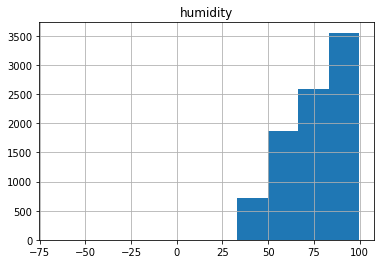

In [13]:
#And humidity...
df.hist(column='humidity')

In [14]:
#Seems like we have a wild outliers again, especially since humidity is a percentage!
df.loc[df['humidity']<0]

,timestamp,humidity
3006,2017-05-06 12:00:00,-50.233333
3007,2017-05-06 13:00:00,-66.710000


array([[<AxesSubplot:title={'center':'humidity'}>]], dtype=object)

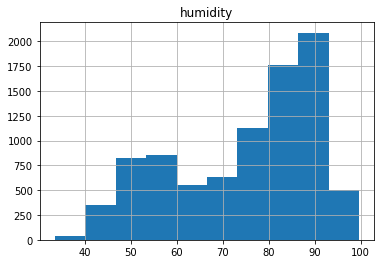

In [15]:
#Here we are, looks nicer
df = df.drop([3006, 3007])
df.hist(column='humidity')

In [16]:
#Any duplicates?
df[df.duplicated()].sum()

humidity    0.0
dtype: float64

In [17]:
#None
#df[df.duplicated()]

In [18]:
#Show mean, standard dev, min, max, and IQRs after dropping rows
df.describe()

,humidity
count,8735.000000
mean,74.927713
std,15.466369
min,33.547667
25%,61.880167
50%,79.760333
75%,87.648333
max,99.651667


In [19]:
#Get median, mode, variance
print("median", df['humidity'].median())
print("mode", mode(df['humidity']).mode[0])
print("variance", df['humidity'].var())

median 79.76033333333334
mode 89.82166666666667
variance 239.20858105470282


<AxesSubplot:xlabel='timestamp'>

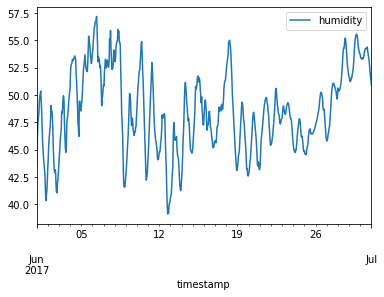

In [21]:
#Let's see the humidity move more easily by limiting the date range
df2 = df[["timestamp", "humidity"]]
df2.drop(df2.loc[df2['timestamp']<"2017-06-01"].index, inplace = True)
df2.drop(df2.loc[df2['timestamp']>"2017-07-01"].index, inplace = True)
df2.plot(x="timestamp", y="humidity")